<a href="https://colab.research.google.com/github/DANGKHOIk22/data-science/blob/main/DS2024_Lab04_22280049_VuDangKhoi_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing:


In [ ]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("College.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

encoding categorical

In [ ]:
data=df.copy()
data_analyze=df.copy()
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
dummies=pd.get_dummies(df.Private,dtype=int)
df=pd.concat([df,dummies],axis=1)

In [ ]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,No,Yes
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,450,2200,70,78,18.1,12,7041,60,0,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,750,1500,29,30,12.2,16,10527,56,0,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,400,1165,53,66,12.9,30,8735,54,0,1
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,450,875,92,97,7.7,37,19016,59,0,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,800,1500,76,72,11.9,2,10922,15,0,1


Drop object features

In [ ]:
df.drop(['Unnamed: 0','Private'],axis=1,inplace=True)

In [ ]:

scaler = MinMaxScaler()
model=scaler.fit(df)
df=model.transform(df)

# Implement the KMeans clustering algorithm from scratch using Numpy

In [ ]:
class KMeans_scratch:
  def __init__(self,n_clusters,weights=None,to=0.01,max_iter=500,initialize=False):

    self.n_clusters=n_clusters
    self.to=to
    self.max_iter=max_iter
    self.n_iter_=0
    self.inertia_=0.0
    self.cluster_centers_=None
    self.labels_=None
    self.weights=weights
    self.loss=None
    self.initialize=initialize


  def initialize_centroid(self,X):

    n_samples, n_features = X.shape

    #Step 1:Calculate the average score of each data point.
    # 1)di= x1, x2,x3,x4…xn
    # 2)di(avg)=(w1*x1+w2*x2+w3*x3+…..wm*xm)/m where x=
    # attribute’s value , m= no of attributes,w= weight to multiply to
    # ensure fair distribution of cluster
    if self.weights is None:
      self.weights = np.ones(n_features) / n_features
    di=np.mean(X* self.weights,axis=1)

    # Step 2: Sort the data based on average score .
    sorted_indices=np.argsort(di)
    sorted_data=X[sorted_indices]

    # Step 3: Divide the data based on k subsets.
    subset_size=len(X)//self.n_clusters
    subsets=np.array_split(sorted_data,subset_size)

    #Step 4 : Calculate the mean value of each subset.
    subsets_mean=[np.mean(i,axis=0) for i in subsets]
    centroids=[]

    #Step 5: Take the nearest possible data point of the mean as the initial centroid
    # for each data subsets.
    for k in range(self.n_clusters):
      distance=np.linalg.norm(X[:,None]-subsets_mean[k],axis=2)
      index=np.argmin(distance,axis=0)
      centroids.append(sorted_data[index])

    self.cluster_centers_ = np.array(centroids).reshape(self.n_clusters,-1)

  def fit(self,X):

    if self.initialize==False:
        self.initialize_centroid(X)
    else:
      self.cluster_centers_=X[np.random.choice(len(X),self.n_clusters,replace=False)]

    loss=[]

    while self.n_iter_<self.max_iter:
      self.n_iter_+=1

      # compute distance
      distance=np.linalg.norm(X[:,None]-self.cluster_centers_,axis=2)

      # update labels_
      self.labels_=np.argmin(distance,axis=1)
      new_centroids = []

      # update cluster_centers_
      for k in range(self.n_clusters):
          cluster_points = X[self.labels_ == k]
          if len(cluster_points) > 0:
                new_centroids.append(np.mean(cluster_points, axis=0))
          else:
                new_centroids.append(self.cluster_centers_[k])
      new_centroids = np.array(new_centroids)

      # check convergence
      wcs=np.sum([np.sum(np.linalg.norm(X[self.labels_==k] - self.cluster_centers_[k], axis=1)**2)
                  for k in range(self.n_clusters)])
      loss.append(wcs)

      if np.sum(np.linalg.norm(new_centroids-self.cluster_centers_,axis=1))<self.to:
        break
      self.cluster_centers_=new_centroids

    # compute inertia
    self.inertia_=np.sum([np.sum(np.linalg.norm(X[self.labels_==k] - self.cluster_centers_[k], axis=1)**2)
                  for k in range(self.n_clusters)])
    self.loss=loss
  def find_outliers(self,X):

    #Step 1: Given an mx by
    # n data matrix X, which is treated as mx (1 by n) row vectors
    # x1, x2... xmx, and my-by-n data matrix Y, which is treated as
    # my (1-by-n) row vectors y1, y2...ymy, the various distances
    # between the vector xs and yt are defined as follows:
    # Euclidean distance : d2st= (xs−yt) (xs−yt)
    pairwiseDistance=np.linalg.norm(X[:,None]-X,axis=2)

    #Step 2: Take maximum and minimum value of pairwise distance for all observation.
    # Threshold value = (maximum distance + minimum distance) ÷ 2
    threshold=(np.max(pairwiseDistance)+np.min(pairwiseDistance))/2

    #Step 3 : Calculate Euclidian distance of all data in the dataset.
    # If distance> Threshold value this data is considered as outlier.
    # If distance ≤ Threshold value this data is not outlier.
    distanceLabels=np.linalg.norm(X-self.cluster_centers_[self.labels_],axis=1)
    return X[distanceLabels>threshold]

  def transform(self,X):

    distance=np.linalg.norm(X[:,None]-self.cluster_centers_,axis=2)
    return distance

  def predict(self,X):

    distance=np.linalg.norm(X[:,None]-self.cluster_centers_,axis=2)
    return np.argmin(distance,axis=1)

  def fit_transform(self,X):

    self.fit(X)
    return self.transform(X)

  def fit_predict(self,X):

    self.fit(X)
    return self.predict(X)

# Testing and Validation:


I decided to use the variance ratio for the weights.

The first eigenvector retains most of the information from the data.Additionally, each value in the eigenvector represents the importance of each feature in that eigenvector. So it can ensure fair distribution of cluster

In [ ]:
pca=PCA(n_components=1)
weights=pca.fit(df).components_

**Compare K-means with random initialization of centroids and K-means without random initialization of centroids**

In [ ]:
iteration=[]
loss=[]

for i in range(1,10):
  kmeans_scratch=KMeans_scratch(n_clusters=4,weights=weights,initialize=True)
  kmeans_scratch.fit(df)
  iteration.append(kmeans_scratch.n_iter_)
  loss.append(kmeans_scratch.inertia_)

In [ ]:
kmeans_scratch=KMeans_scratch(n_clusters=4,weights=weights)
kmeans_scratch.fit(df)

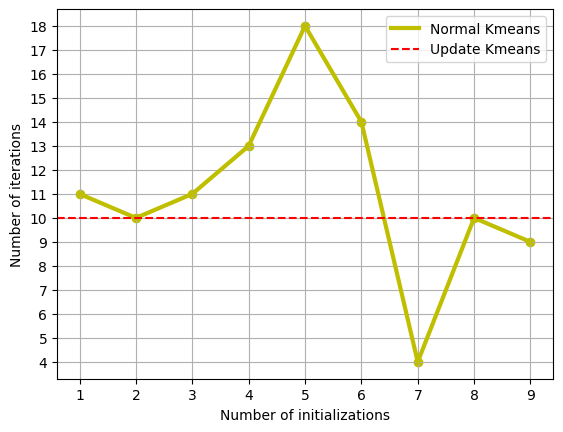

In [ ]:
plt.plot(range(1,10),iteration,color='y',linewidth='3',label='Normal Kmeans')
plt.yticks(np.arange(min(iteration), max(iteration) + 1, 1))
plt.axhline(kmeans_scratch.n_iter_,color='r', linestyle='--',label='Update Kmeans')
plt.scatter(range(1,10),np.array(iteration),color='y')
plt.ylabel("Number of iterations")
plt.xlabel("Number of initializations")
plt.legend()
plt.grid()

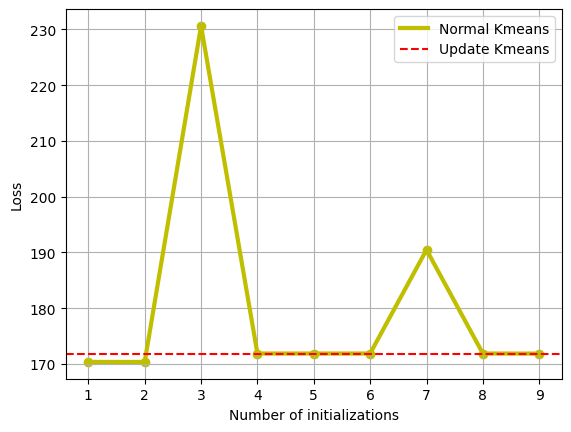

In [ ]:
plt.plot(range(1,10),loss,color='y',linewidth='3',label='Normal Kmeans')
plt.axhline(kmeans_scratch.inertia_,color='r', linestyle='--',label='Update Kmeans')
plt.scatter(range(1,10),loss,color='y')
plt.ylabel("Loss")
plt.xlabel("Number of initializations")
plt.legend()
plt.grid()

Feedback: Initializing centroids is a chancy process; it can lead to cases with high iterations to converge and suboptimal loss. Sometimes, it can reach optimal loss with fewer iterations to converge.

**Delete outliers by Kmeans**

Outliers can significantly affect the performance of the K-means clustering algorithm in several ways:

Influence on Centroids: Outliers can pull centroids away from the dense regions of the data, leading to inaccurate cluster centers. Since K-means minimizes the sum of squared distances between points and their corresponding centroids, a few outliers can disproportionately affect the position of the centroids.

Outliers increase the overall SSE of the clustering result, which is the objective function K-means tries to minimize. This makes it harder to achieve a good clustering solution as the algorithm tries to adjust centroids to reduce the impact of outliers.

Slower Convergence: Outliers can slow down the convergence of the algorithm, as K-means may require more iterations to adjust the centroids to a stable state.

In [ ]:
kmeans_scratch.inertia_

171.8700689225492

In [ ]:
loss_before=[]
for i in range(2,11):
  kmeans_scratch=KMeans_scratch(n_clusters=i,weights=weights)
  kmeans_scratch.fit(df)
  loss_before.append(kmeans_scratch.inertia_)

I deleted all outliers for each respective cluster.

In [ ]:
def delete_outliers(data,outliers):
  outlier_indices = []

  for index, point in enumerate(df):
    for i in range(len(outliers)):
        if np.array_equal(point, outliers[i]):
            outlier_indices.append(index)

  return np.delete(data,outlier_indices,axis=0)

In [ ]:
for i in range(2,11):
  kmeans_scratch=KMeans_scratch(n_clusters=i,weights=weights)
  kmeans_scratch.fit(df)
  outliers=kmeans_scratch.find_outliers(df)
  df=delete_outliers(df,outliers)

In [ ]:
loss_after=[]
for i in range(2,11):
  kmeans_scratch=KMeans_scratch(n_clusters=i,weights=weights)
  kmeans_scratch.fit(df)
  loss_after.append(kmeans_scratch.inertia_)

Text(0, 0.5, 'Loss')

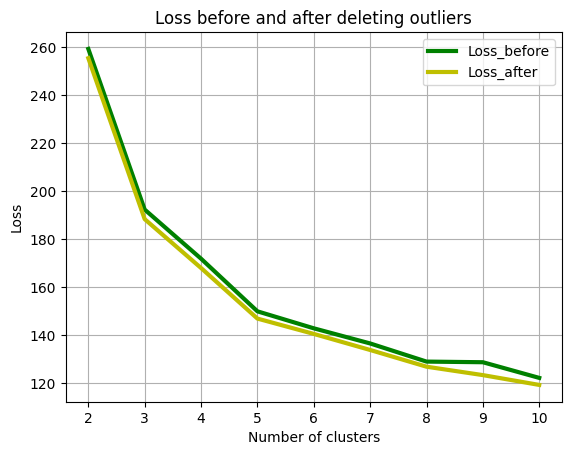

In [ ]:
plt.title("Loss before and after deleting outliers")
plt.plot(range(2,11),loss_before,color='g',linewidth='3',label='Loss_before')
plt.plot(range(2,11),loss_after,color='y',linewidth='3',label='Loss_after')
plt.grid()
plt.legend()
plt.xlabel("Number of clusters")
plt.ylabel("Loss")

Feedback: Deleting outliers can help reduce loss in  clusters .

**Test  your custom KMeans class implementation on the provided dataset.**


In [ ]:
kmeans_scratch=KMeans_scratch(n_clusters=4,weights=weights)
loss=kmeans_scratch.fit(df)
kmeans_scratch.inertia_

167.98856647992827

The result from my Kmean implementation and Kmean implemetation from sklearn is the nearly

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0,n_init="auto")
kmeans.fit(df)
kmeans.inertia_

167.29043239849872

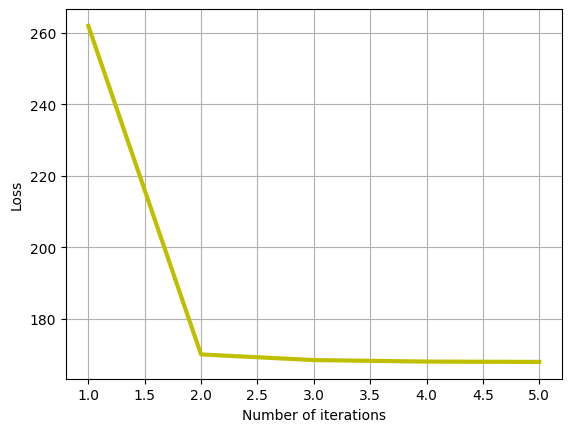

In [ ]:
plt.plot(range(1,len(kmeans_scratch.loss)+1),kmeans_scratch.loss,color='y',linewidth='3')
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.grid()

The loss always decreases because of the following reasons:

First, we move the current centroid to the mean of the cluster, which reduces the distance between the samples and the centroid.

Second, when we update the labels, we assign points to the closest centroid, thus lowering the overall distance and discarding points that are further away.

**Validate the correctness of your implementation by comparing results with sklearn's KMeans implementation.**

In [ ]:
loss=[]
loss_scratch=[]
n_iter=[]
n_iter_scratch=[]
sil_score=[]
sil_score_scratch=[]

for i in range(2,11):

  kmeans = KMeans(n_clusters=i, random_state=0,n_init="auto").fit(df)
  kmeans_scratch=KMeans_scratch(n_clusters=i,weights=weights)
  kmeans_scratch.fit(df)

  loss.append(kmeans.inertia_)
  loss_scratch.append(kmeans_scratch.inertia_)

  n_iter.append(kmeans.n_iter_)
  n_iter_scratch.append(kmeans_scratch.n_iter_)

  sil_score.append(silhouette_score(df,kmeans.labels_))
  sil_score_scratch.append(silhouette_score(df,kmeans_scratch.labels_))


Text(0, 0.5, 'Loss')

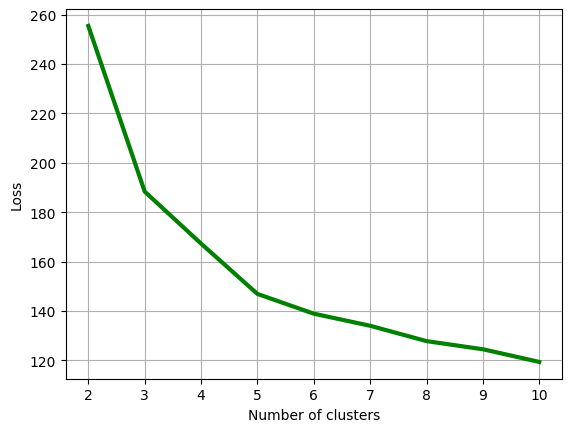

In [ ]:
plt.plot(range(2,11),loss,color='g',linewidth='3',label='Sklearn')
plt.grid()
plt.xlabel("Number of clusters")
plt.ylabel("Loss")

Loss will decrease gradually as the number of  clusters(k) increases, and reach 0 when the number of clusters equals the number of samples

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0,n_init="auto").fit(df)
kmeans_scratch=KMeans_scratch(n_clusters=4,weights=weights)
kmeans_scratch.fit(df)

In [ ]:
score=[]
score.append(kmeans.inertia_)
score.append(kmeans_scratch.inertia_)

The inertia between my Kmeans implementation and Kmeans Scratch is equal.

Text(0, 0.5, 'Inertia')

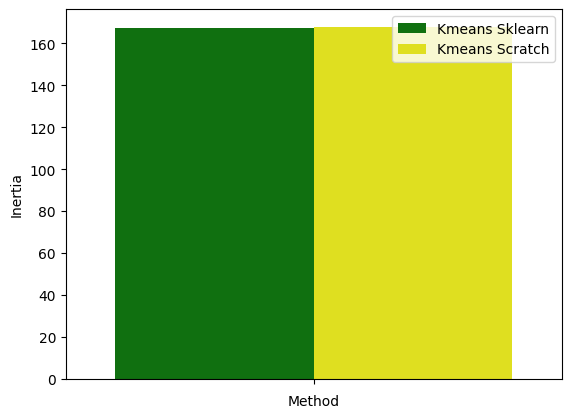

In [ ]:
colors = [ '#008000','#FFFF00']
ax = sns.barplot(hue=['Kmeans Sklearn', 'Kmeans Scratch'], y=score, palette=colors)
plt.xlabel('Method')
plt.ylabel('Inertia')

The centroid in the KMeans implementation from scratch is close to the one in KMeans from Scikit-Learn.

In [ ]:
round(np.sum(np.linalg.norm(kmeans_scratch.cluster_centers_-kmeans.cluster_centers_,axis=1)))

5

In [ ]:
score=[]
score.append(silhouette_score(df,kmeans.labels_))
score.append(silhouette_score(df,kmeans_scratch.labels_))

The Silhouette score of my Kmeans implementation is higher than that of Kmeans implemented in Sklearn.

Text(0, 0.5, 'Silhouette score')

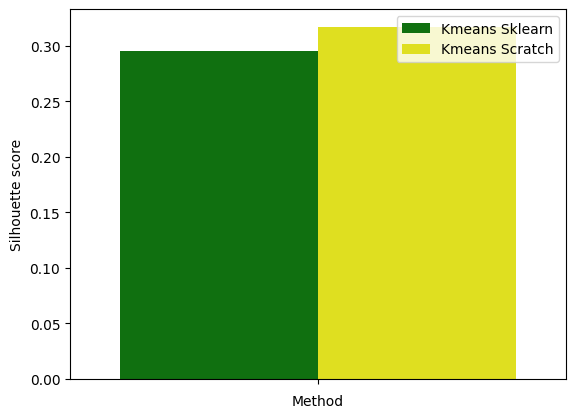

In [ ]:
colors = ['#008000','#FFFF00']
ax = sns.barplot(hue=['Kmeans Sklearn', 'Kmeans Scratch'], y=score, palette=colors)
plt.xlabel('Method')
plt.ylabel('Silhouette score')

In [ ]:
score=[]
score.append(kmeans.n_iter_)
score.append(kmeans_scratch.n_iter_)

The iteration of my Kmeans implementation is lower than that of implemented in Sklearn

Text(0, 0.5, 'Iterations')

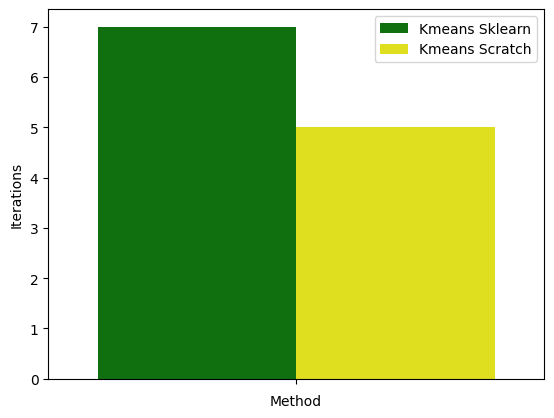

In [ ]:
colors = [ '#008000','#FFFF00']
ax = sns.barplot(hue=['Kmeans Sklearn', 'Kmeans Scratch'], y=score, palette=colors)
plt.xlabel('Method')
plt.ylabel('Iterations')

The loss between the two Kmeans is equal.

Text(0, 0.5, 'Loss')

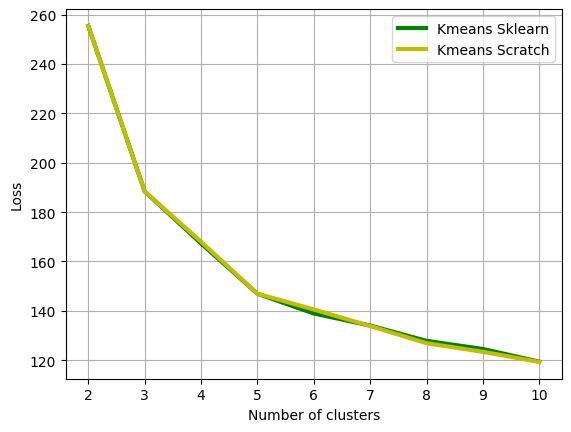

In [ ]:
plt.plot(range(2,11),loss,color='g',linewidth='3',label='Kmeans Sklearn')
plt.plot(range(2,11),loss_scratch,color='y',linewidth='3',label='Kmeans Scratch')
plt.grid()
plt.legend()
plt.xlabel("Number of clusters")
plt.ylabel("Loss")

My K-means implementation has significantly fewer iterations than the one in sklearn's K-means in some clusters

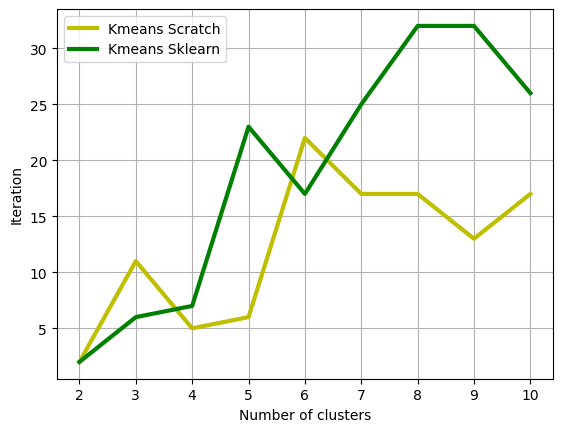

In [ ]:
plt.plot(range(2,11),n_iter_scratch,linewidth='3',color='y',label='Kmeans Scratch')
plt.plot(range(2,11),n_iter,color='g',linewidth='3',label='Kmeans Sklearn')
plt.xlabel("Number of clusters")
plt.ylabel("Iteration")
plt.legend()
plt.grid()

The Silhouette score from the KMeans implementation in scikit-learn and my custom KMeans implementation does not deviate significantly.

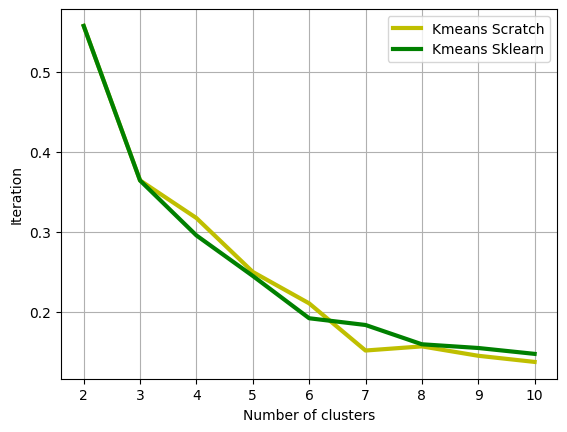

In [ ]:
plt.plot(range(2,11),sil_score_scratch,linewidth='3',color='y',label='Kmeans Scratch')
plt.plot(range(2,11),sil_score,color='g',linewidth='3',label='Kmeans Sklearn')
plt.xlabel("Number of clusters")
plt.ylabel("Iteration")
plt.legend()
plt.grid()

**Experiment with different values of K (number of clusters) and choose an optimal value based on appropriate evaluation metrics (e.g., silhouette score, elbow method).**

In [ ]:
loss=[]
for i in range(1,11):

   kmeans = KMeans(n_clusters=i, random_state=0,n_init="auto").fit(df)
   loss.append(kmeans.inertia_)

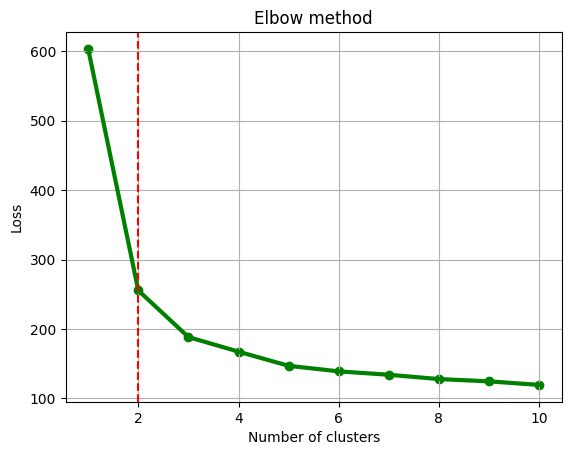

In [ ]:
plt.plot(range(1,11),loss,color='g',linewidth='3')
plt.grid()
plt.scatter(range(1,11),loss,color='g')
plt.xlabel("Number of clusters")
plt.ylabel("Loss")
plt.title("Elbow method")
plt.axvline(2,color='r', linestyle='--')

We can see that the graph will rapidly change at 2 clusters and thus creating an elbow shape. From this point, the graph moves almost parallel to the X-axis. The 2 clusters  is an optimal number of clusters

In [ ]:
score=[]
for i in range(2,11):

   kmeans = KMeans(n_clusters=i, random_state=0,n_init="auto").fit(df)
   score.append(silhouette_score(df, kmeans.fit_predict(df)))

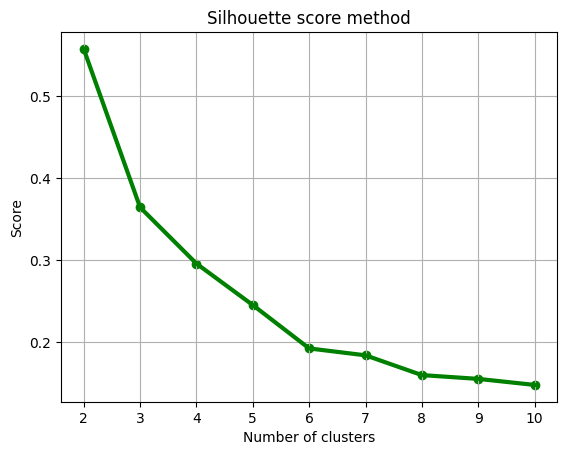

In [ ]:
plt.title("Silhouette score method")
plt.plot(range(2,11),score,color='g',linewidth='3')
plt.scatter(range(2,11),score,color='g')
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.grid()

We can see that 2 clusters having highest score

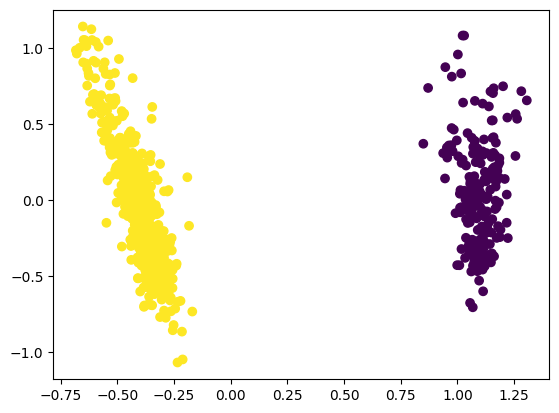

In [ ]:
pca=PCA(n_components=2)
df_new=pca.fit_transform(df)
kmeans=KMeans(n_clusters=2, random_state=0,n_init="auto").fit(df)
plt.scatter(df_new[:,0],df_new[:,1],c=kmeans.labels_)

Using PCA, i have 2 distinct clusters

I use cross-validation to find the optimal number of clusters. If I split the data into 5 folds, and each fold indicates that 2 clusters are optimal, then that is the configuration I will use

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_clusters':range(2,11),
            'max_iter':[50,100],
            'n_init':[10,20]}
kmeans=KMeans()
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, scoring='homogeneity_score', cv=5, n_jobs=-1)

grid_search.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=KMeans(), n_jobs=-1,
             param_grid={'max_iter': [50, 100], 'n_clusters': range(2, 11),
                         'n_init': [10, 20]},
             scoring='homogeneity_score')

In [ ]:
grid_search.best_estimator_

KMeans(max_iter=50, n_clusters=2, n_init=10)

So k=2 is an optimal cluster

**Compare the results of your K-means and the Sklearn K-means with the Private attribute in the dataset (ground truth).**

In [ ]:
data['Private']=data['Private'].map({'Yes':1,'No':0})

In [ ]:
ground_truth=np.array(data['Private'])
data.drop(['Private'],axis=1,inplace=True)

In [ ]:
scaler = MinMaxScaler()
model=scaler.fit(data)
data=model.transform(data)

In [ ]:
pca=PCA(n_components=1)
weights=pca.fit(data).components_
kmeans_scratch=KMeans_scratch(n_clusters=2,weights=weights)
kmeans_scratch.fit(data)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0,n_init="auto").fit(data)

In [ ]:
score=[]
score.append(accuracy_score(kmeans.labels_,ground_truth))
score.append(accuracy_score(kmeans_scratch.labels_,ground_truth))

My kmeans implementaion has lower accuracy score than the one in Kmeans Sklearn

Text(0, 0.5, 'Accuracy score')

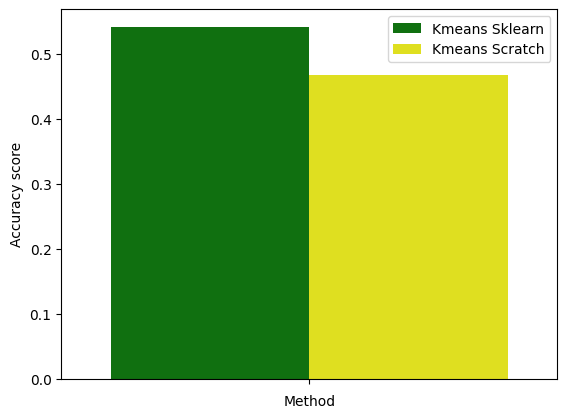

In [ ]:
colors = [ '#008000','#FFFF00']
ax = sns.barplot(hue=['Kmeans Sklearn', 'Kmeans Scratch'], y=score, palette=colors)
plt.xlabel('Method')
plt.ylabel('Accuracy score')

Because K-means is an unsupervised learning algorithm, the predicted results may differ from the actual outcomes

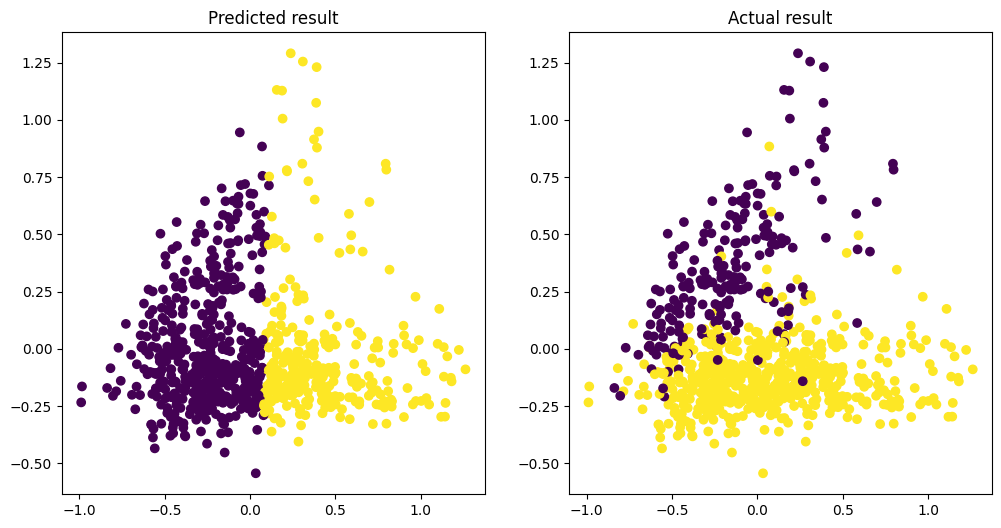

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Predicted result')
pca=PCA(n_components=2)
data_new=pca.fit_transform(data)
plt.scatter(data_new[:,0],data_new[:,1],c=kmeans.labels_)
plt.subplot(1, 2, 2)
plt.title('Actual result')
plt.scatter(data_new[:,0],data_new[:,1],c=ground_truth)

# Analysis and Interpretation:

In PCA, we project data onto principal components to retain as much information as possible. Looking at the plot, we can see that the data is distributed into two clusters.

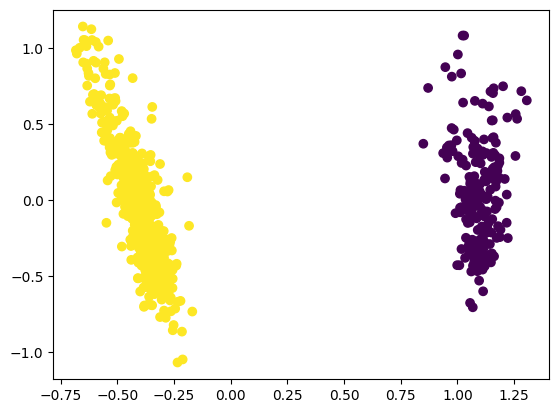

In [ ]:
pca=PCA(n_components=2)
df_new=pca.fit_transform(df)
kmeans=KMeans(n_clusters=2, random_state=0,n_init="auto").fit(df)
plt.scatter(df_new[:,0],df_new[:,1],c=kmeans.labels_)

LDA is a supervised dimensionality reduction technique that projects the data onto a lower-dimensional space while maximizing the separation between classes.It can be more effective than PCA for classification tasks when the classes are linearly separable.  

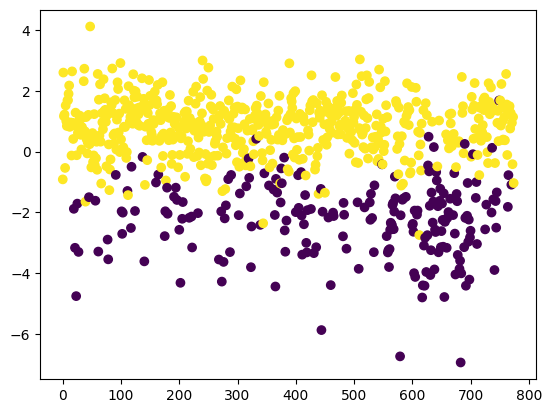

In [ ]:
kmeans=KMeans(n_clusters=2, random_state=0,n_init="auto").fit(df)
lda = LinearDiscriminantAnalysis(n_components=1)
df_new=lda.fit_transform(df,kmeans.labels_)
plt.scatter(range(len(df_new[:,0])),df_new[:,0],c=kmeans.labels_)

In [ ]:
def plotClusters(data,labels,centroid,iteration):

  lda = LinearDiscriminantAnalysis(n_components=2)
  df_new=lda.fit_transform(df,labels)
  centroid_new=lda.transform(kmeans.cluster_centers_)

  plt.title(f"Iteration:{iteration}")
  plt.scatter(df_new[:,0],df_new[:,1],c=labels)

  for i in range(centroid_new.shape[0]):
        plt.scatter(centroid_new[i, 0], centroid_new[i, 1], c='r', marker='X')
  plt.show()

We can see that centroids gradually move towards the center of clusters after several iterations

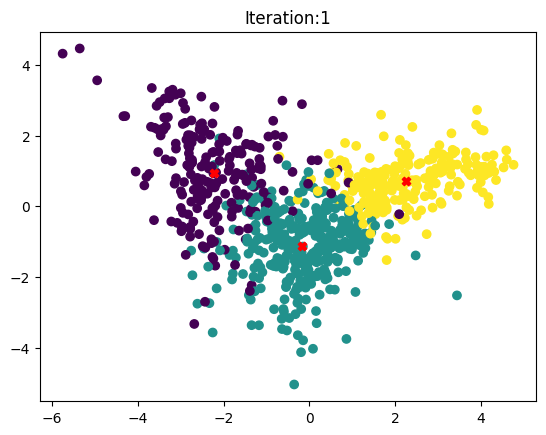

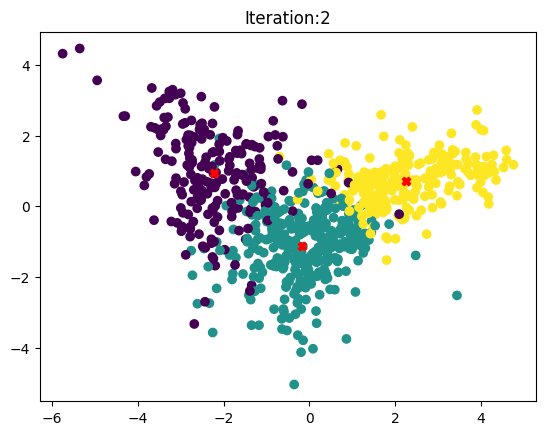

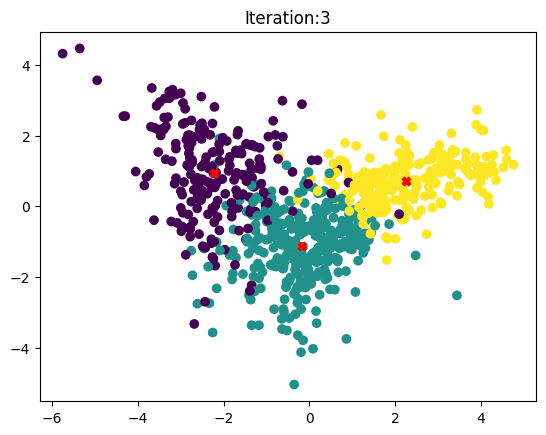

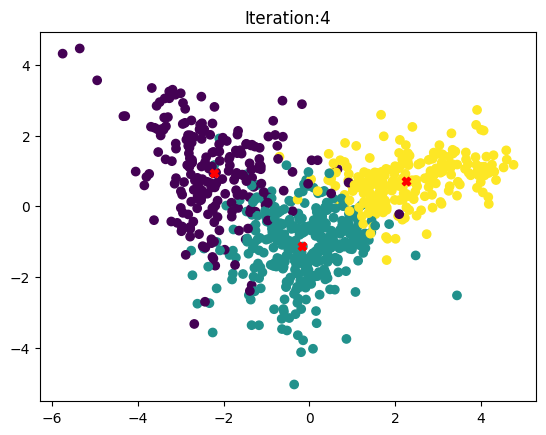

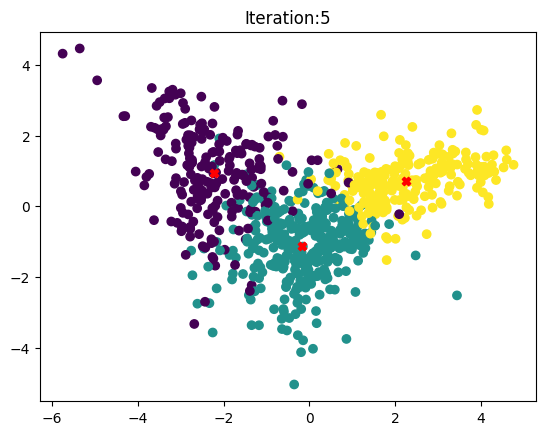

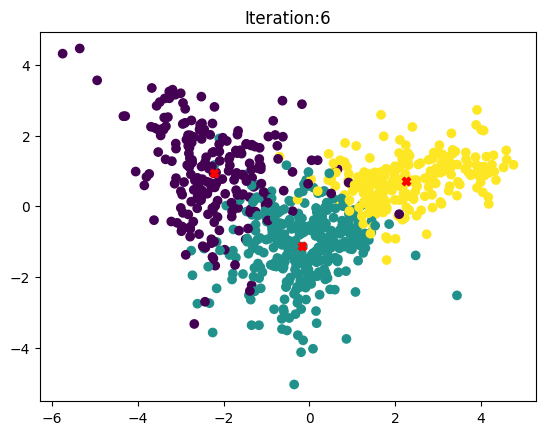

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0,n_init="auto").fit(df)
for i in range(kmeans.n_iter_):
    kmeans.fit(df)
    plotClusters(df, kmeans.labels_, kmeans.cluster_centers_, i+1)

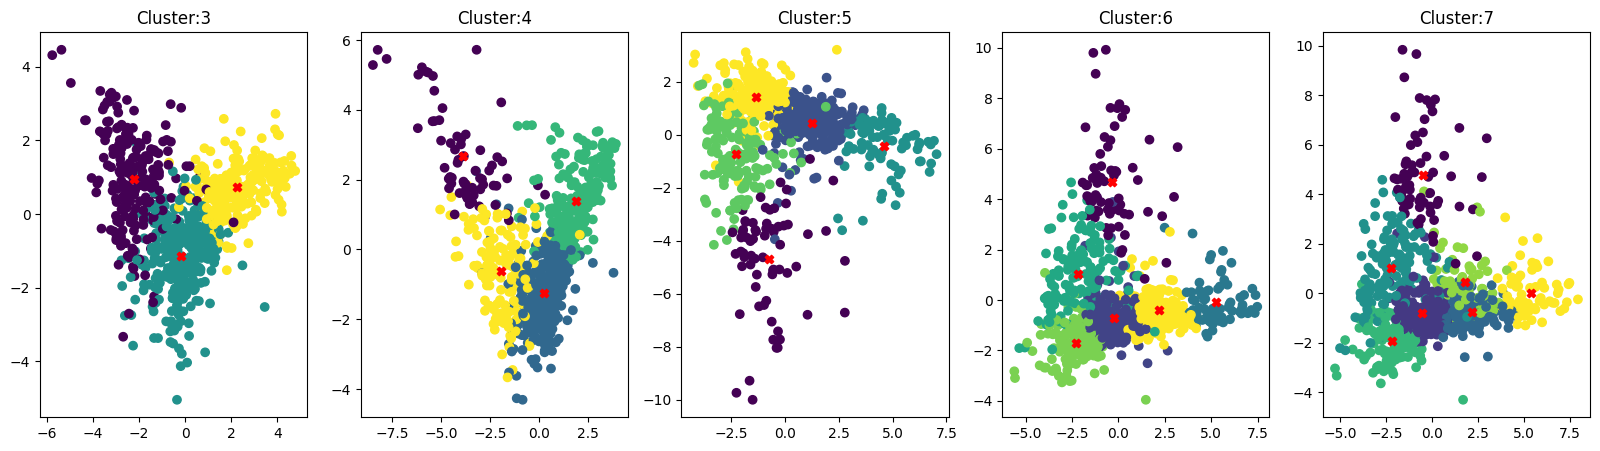

In [ ]:
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,5))

for i,ax in enumerate(fig.axes,start=2):

  kmeans = KMeans(n_clusters=i+1, random_state=0,n_init="auto").fit(df)

  lda = LinearDiscriminantAnalysis(n_components=2)
  df_new=lda.fit_transform(df,kmeans.labels_)
  centroids_new=lda.transform(kmeans.cluster_centers_)

  ax.scatter(x=df_new[:,0],y=df_new[:,1],c=kmeans.labels_)
  ax.scatter(x=centroids_new[:,0],y=centroids_new[:,1],c='r', marker='X')
  ax.set_title(f'Cluster:{i+1}')

We can see that the distance from centroids to that all their respective data points  decreases more and more with  clusters

In [ ]:
data_analyze.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0,n_init="auto").fit(data)

In [ ]:
score=[]
score.append(np.sum(kmeans.labels_))
score.append(len(data)-np.sum(kmeans.labels_))

Text(0, 0.5, 'The number of universities')

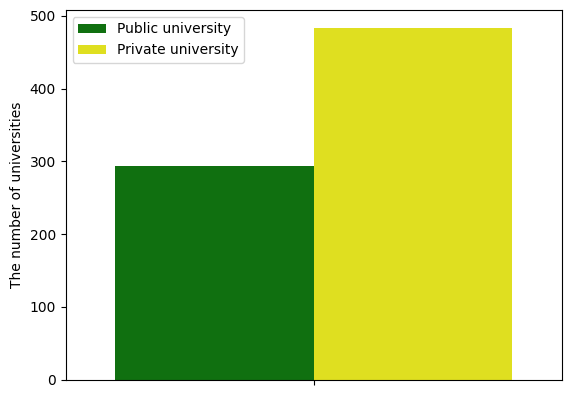

In [ ]:
colors = ['#008000','#FFFF00']
ax = sns.barplot(hue=['Public university', 'Private university'], y=score, palette=colors)
plt.ylabel('The number of universities')

There more more private universities than public universities

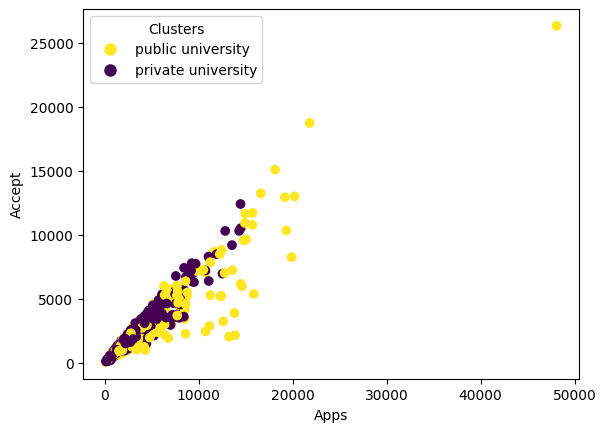

In [ ]:
scatter=plt.scatter(x=data_analyze['Apps'],y=data_analyze['Accept'],c=kmeans.labels_)
unique_labels = np.unique(kmeans.labels_)

handles=[]
handles.append(plt.Line2D([0], [0], marker='o', color='w', label='public university',
                      markersize=10, markerfacecolor=scatter.cmap(scatter.norm(1))))
handles.append(plt.Line2D([0], [0], marker='o', color='w', label='private university',
                      markersize=10, markerfacecolor=scatter.cmap(scatter.norm(0))))
plt.xlabel('Apps')
plt.ylabel('Accept')
# Add legend to plot
plt.legend(handles=handles, title="Clusters")

Public universities receive and accept more applications than private universities.

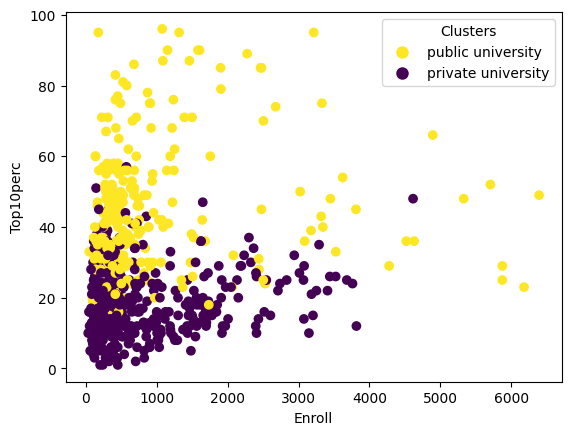

In [ ]:
scatter=plt.scatter(x=data_analyze['Enroll'],y=data_analyze['Top10perc'],c=kmeans.labels_)
unique_labels = np.unique(kmeans.labels_)

handles=[]
handles.append(plt.Line2D([0], [0], marker='o', color='w', label='public university',
                      markersize=10, markerfacecolor=scatter.cmap(scatter.norm(1))))
handles.append(plt.Line2D([0], [0], marker='o', color='w', label='private university',
                      markersize=10, markerfacecolor=scatter.cmap(scatter.norm(0))))
plt.xlabel('Enroll')
plt.ylabel('Top10perc')
# Add legend to plot
plt.legend(handles=handles, title="Clusters")

The number of students enrolled in public universities is higher than that in private universities. Additionally, public universities have more top students from high school classes.

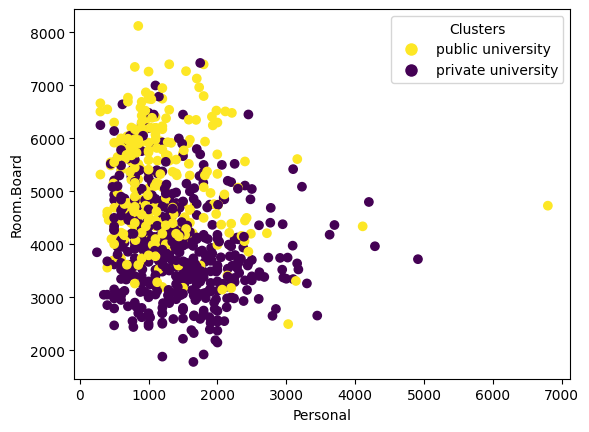

In [ ]:
scatter=plt.scatter(x=data_analyze['Personal'],y=data_analyze['Room.Board'],c=kmeans.labels_)
unique_labels = np.unique(kmeans.labels_)

handles=[]
handles.append(plt.Line2D([0], [0], marker='o', color='w', label='public university',
                      markersize=10, markerfacecolor=scatter.cmap(scatter.norm(1))))
handles.append(plt.Line2D([0], [0], marker='o', color='w', label='private university',
                      markersize=10, markerfacecolor=scatter.cmap(scatter.norm(0))))
plt.xlabel('Personal')
plt.ylabel('Room.Board')
# Add legend to plot
plt.legend(handles=handles, title="Clusters")

Students tend to spend more money when studying at private universities. The cost for room and board is higher at public universities.

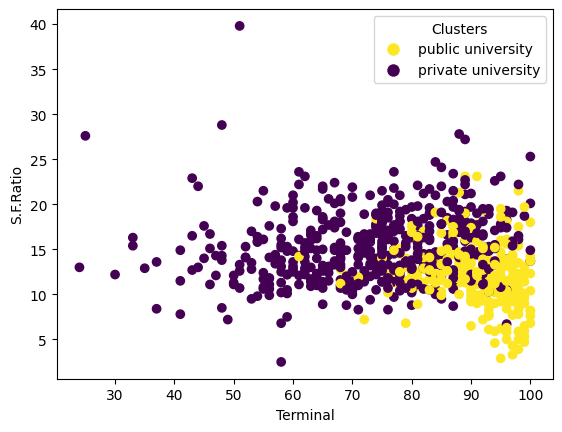

In [ ]:
scatter=plt.scatter(x=data_analyze['Terminal'],y=data_analyze['S.F.Ratio'],c=kmeans.labels_)
unique_labels = np.unique(kmeans.labels_)

handles=[]
handles.append(plt.Line2D([0], [0], marker='o', color='w', label='public university',
                      markersize=10, markerfacecolor=scatter.cmap(scatter.norm(1))))
handles.append(plt.Line2D([0], [0], marker='o', color='w', label='private university',
                      markersize=10, markerfacecolor=scatter.cmap(scatter.norm(0))))
plt.xlabel('Terminal')
plt.ylabel('S.F.Ratio')
# Add legend to plot
plt.legend(handles=handles, title="Clusters")

Terminal is often considered in conjunction with other factors when assessing the overall academic reputation and excellence of a university. Thus, public universities are often perceived as more prestigious than private universities. However, private universities typically have a higher student/faculty ratio.

# Clustering by the K-Means Algorithm Using a Split and Merge Procedure

 K-Means algorithm using a split and merge
procedure and investigate the classification performance.
After classifying data by the ordinary K-Means algorithm,
we obtain K decision regions. A method determining whether
or not there is only a cluster in each decision region is
introduced, where the K-Means algorithm is applied to each
decision region again, and a measure of splitting a decision
region into m subregions is introduced. When it is determined
that the decision region must be split into subregions, by
comparing the Euclidian distances between cluster centers
of the subregions and adjacent decision regions, the other
subregions except one subregion are merged into appropriate
adjacent decision regions.

In [ ]:
clusters=3
subregion=3
kmeans=KMeans(n_clusters=clusters, random_state=0,n_init="auto")
kmeans.fit(df)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [ ]:
L = [{'Decision region': f'R{i+1}', 'Number': sum(kmeans.labels_ == i)} for i in range(clusters)]
pd.DataFrame(L)

,Decision region,Number
0,R1,211
1,R2,329
2,R3,235


In [ ]:
L = []

for k in range(clusters):
    D = [] # Distances from centroids to their respective data points
    for sub in range(1, subregion+1):

        kmeans_sub = KMeans(n_clusters=sub, random_state=0, n_init="auto")
        kmeans_sub.fit(df[kmeans.labels_ == k])
        D.append( kmeans_sub.inertia_)

    L.append(D)

In [ ]:
columns = ["D(m={},k)".format(m) for m in range(1, subregion+1)]
index=['k={}'.format(k+1) for k in range(clusters)]
D_data=pd.DataFrame(L, index=index, columns=columns)
D_data

,"D(m=1,k)","D(m=2,k)","D(m=3,k)"
k=1,67.635844,46.580552,40.187538
k=2,67.203488,54.913789,49.562831
k=3,53.506392,37.459651,33.216522


With each region, i split into m=3 subregion

In [ ]:
L = []
for k in range(clusters):
  p=[] # the ration bewteen D(m) and D(m-1)

  for sub in range(2, subregion+1):

    p.append(D_data.iloc[k,sub-1]/D_data.iloc[k,sub-2])

  L.append(p)

In [ ]:
columns=[f"p(m={sub},k)" for sub in range(2,subregion+1)]
pd.DataFrame(L,columns=columns,index=index)

,"p(m=2,k)","p(m=3,k)"
k=1,0.688696,0.862754
k=2,0.817127,0.902557
k=3,0.700097,0.886728


We can see that p(m=2,k=1) and p(m=2,k=3) are very smaller compared to p(m=2,k=2) .it is determined that m∗ = 2 and the decision regions R1 and R3 must be split into two subregions, respectively. So subregion from R1 and R3 will merge into adjacent decision R2 region.

DISTANCE TABLE

In [ ]:
centroid_sub = []  # compute centroid each sub region
for k in range(clusters):
  if k==1:
    pass

  kmeans_sub = KMeans(n_clusters=2, random_state=0, n_init="auto")
  kmeans_sub.fit(df[kmeans.labels_ == k])
  centroid_sub.append( kmeans_sub.cluster_centers_)

In [ ]:
D=[] # Distance from the centroid subregion to all data points in the region K
for k in range(clusters):
    for sub in range(2):
      D.append(np.sum(np.linalg.norm(df[kmeans.labels_==k][:,None]-centroid_sub[sub],axis=2),axis=0).tolist())

In [ ]:
D

[[114.99929740265075, 147.7574223387469],
 [334.65027980880353, 342.91203308626655],
 [503.5165452555366, 565.6009272619867],
 [150.0053240155153, 155.49793888284884],
 [400.737655971958, 399.14310177075413],
 [159.5935366584738, 227.9228469995437]]

Each pair of rows contains the distances from the centroid subregions of R1 and R3 to all data points in the region. Stack these rows based on the region

In [ ]:
DD=[]
lis=[]
for index,value in enumerate(D):
    lis.append(value[0])
    lis.append(value[1])

    if index%2!=0:
       DD.append(lis)
       lis=[]


In [ ]:
DD

[[114.99929740265075,
  147.7574223387469,
  334.65027980880353,
  342.91203308626655],
 [503.5165452555366, 565.6009272619867, 150.0053240155153, 155.49793888284884],
 [400.737655971958, 399.14310177075413, 159.5935366584738, 227.9228469995437]]

In [ ]:
columns=[f"R{sub}" for sub in range(1,subregion+1)]
table=pd.DataFrame(list(zip(*DD)),columns=columns,index=['R(k=1,m=1)','R(k=1,m=2)','R(k=3,m=1)','R(k=3,m=2)'])

In [ ]:
table.iloc[[0,1],0]=999
table.iloc[[2,3],2]=999

In [ ]:
table['d_min']=table.min(axis=1)

Ignore distance from centroid subregion to respective region

In [ ]:
table.iloc[[0,1],0]=np.nan
table.iloc[[2,3],2]=np.nan

I retain the subregion with the highest minimum distance to other regions and merge all other subregions with adjacent region. => So retain
R(k=1,m=1), R(k=3,m=2) and merge R(k=1,m=2)
R(k=3,m=1)

In [ ]:
table

,R1,R2,R3,d_min
"R(k=1,m=1)",NaN,503.516545,400.737656,400.737656
"R(k=1,m=2)",NaN,565.600927,399.143102,399.143102
"R(k=3,m=1)",334.650280,150.005324,NaN,150.005324
"R(k=3,m=2)",342.912033,155.497939,NaN,155.497939


In [ ]:
label_sub=[] # finding labels from subregion
for k in range(clusters):
  if k!=1:
    kmeans_sub = KMeans(n_clusters=2, random_state=0, n_init="auto")
    kmeans_sub.fit(df[kmeans.labels_ == k])
    label_sub.append(kmeans_sub.labels_)

In [ ]:
labels=kmeans.labels_.copy()

In [ ]:
index_0=0
# merging R(k=1,m=2)	 to region R2
for i in range(len(labels)):
  if labels[i]==0 :
    if label_sub[0][index_0]==1:
       labels[i]=1
    index_0=index_0+1
index_0=0
# merging R(k=3,m=1)	 to region R2
for i in range(len(labels)):
  if labels[i]==2 :
    if label_sub[1][index_0]==0:
       labels[i]=1
    index_0=index_0+1


new clustering method by the K-Means
algorithm using the split and merge procedure to improve
the classification performance of the ordinary K-Means algorithm

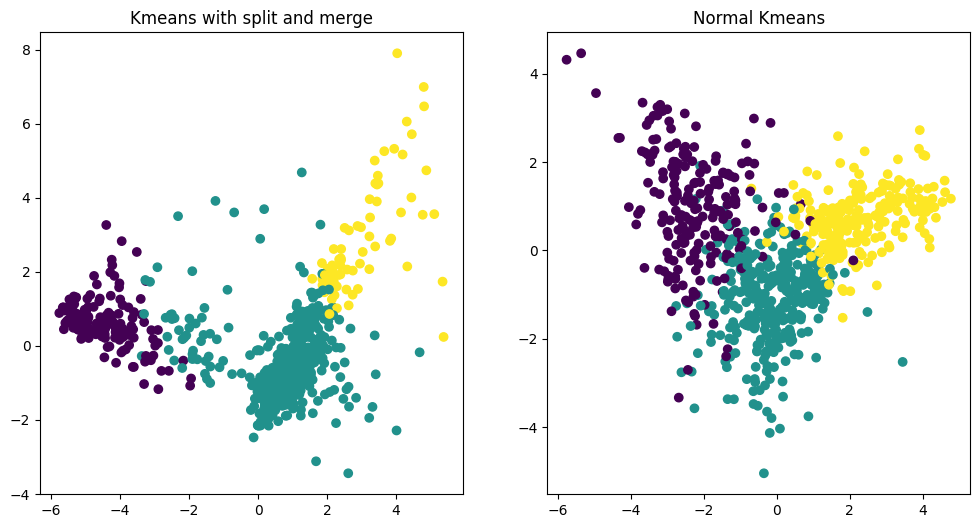

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Kmeans with split and merge")
lda = LinearDiscriminantAnalysis(n_components=2)
df_new=lda.fit_transform(df,labels)
plt.scatter(df_new[:,0],df_new[:,1],c=labels)
plt.subplot(1, 2, 2)
plt.title("Normal Kmeans")
lda = LinearDiscriminantAnalysis(n_components=2)
df_new=lda.fit_transform(df,kmeans.labels_)
plt.scatter(df_new[:,0],df_new[:,1],c=kmeans.labels_)

we can see that Kmeans with split and merge has clearer clustering